<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 149.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 175.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 145.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 141.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 158.2 MB/s eta 0:00:00


In [2]:
# Disabling scientific notation globally in Pandas
pd.set_option('display.float_format', '{:,.2f}'.format)


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [3]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [4]:
df['Industry']=df['Industry'].fillna('No Response')

In [5]:
print(df['Industry'].value_counts(), df['Industry'].isna().sum())

Industry
No Response                                   36579
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64 0


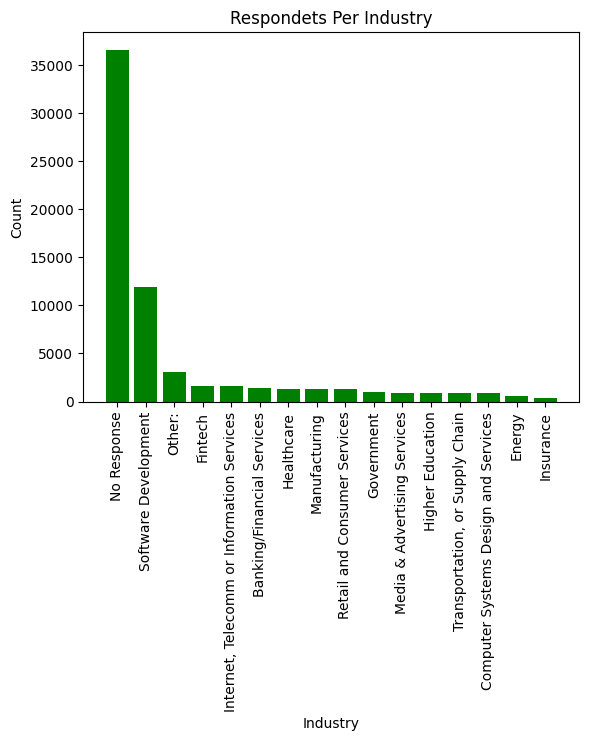

In [6]:
counts = df['Industry'].value_counts()
plt.bar(x = counts.index, height = counts.values, data=counts, color = 'green')
plt.xticks(rotation = 90)
plt.title('Respondets Per Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.show()

In [7]:
#Most of the respondents didn't answer this question, 
#there might be several reasons, they might not be working, or they didn't want to provide the info for some other reason.
#most of the respondents that provided their industry work in software dev and other tech related feilds.                                                                                                                                   

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [8]:
##Write your code here
df['ConvertedCompYearly'].describe()

count       23,435.00
mean        86,155.29
std        186,756.97
min              1.00
25%         32,712.00
50%         65,000.00
75%        107,971.50
max     16,256,603.00
Name: ConvertedCompYearly, dtype: float64

In [9]:
mean =86155.29
std = 186756.97

threshold = mean + (std*3)

print(threshold)

646426.2000000001


In [10]:
threshold_list = []

for v in df['ConvertedCompYearly']:
    if v > threshold:
        threshold_list.append(v)
print((threshold_list))

[650000.0, 1000000.0, 945000.0, 750000.0, 2000000.0, 1000000.0, 800000.0, 1302817.0, 1031099.0, 650000.0, 750000.0, 1052581.0, 1728025.0, 1074062.0, 1500000.0, 950000.0, 1184707.0, 798000.0, 1188001.0, 1000000.0, 1273879.0, 1332930.0, 13818022.0, 700000.0, 660660.0, 1000000.0, 803285.0, 1500000.0, 2048046.0, 670000.0, 859250.0, 1750749.0, 750000.0, 740517.0, 750000.0, 16256603.0, 1550391.0, 800000.0, 700000.0, 6340564.0, 4936778.0, 1000000.0, 1200000.0, 875000.0, 750000.0, 1200000.0, 3367716.0, 750000.0, 1562898.0, 750000.0, 2014062.0, 750000.0, 713372.0, 2584118.0, 750000.0, 700000.0, 764327.0, 1250348.0, 912953.0, 810000.0, 750000.0, 1295242.0, 2000000.0, 650000.0, 1200000.0, 9000000.0, 650000.0, 980887.0, 850000.0, 720000.0, 675000.0, 1750000.0, 712801.0, 1074062.0, 2237846.0, 1200000.0, 1500000.0, 2153432.0, 1188001.0, 1140481.0, 1900000.0, 1288874.0, 900000.0, 859250.0, 1000000.0, 1300000.0, 800000.0, 750000.0, 700000.0]


In [12]:
threshold_df = df[df['ConvertedCompYearly'].isin(threshold_list)]

threshold_df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,40.00,20.00,0.00,30.00,10.00,0.00,Appropriate in length,Easy,"650,000.00",6.00
828,829,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Bootstrapping a business;Professional de...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,30.00,10.00,0.00,5.00,0.00,0.00,Appropriate in length,Neither easy nor difficult,"1,000,000.00",8.00
1932,1933,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Books;Written Tu...,...,15.00,10.00,15.00,15.00,0.00,15.00,Appropriate in length,Easy,"945,000.00",2.00
2171,2172,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,20.00,10.00,20.00,25.00,0.00,0.00,Appropriate in length,Easy,"750,000.00",8.00
2187,2188,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,"2,000,000.00",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38219,38220,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,On the job training;Other online resources (e....,Books;Written Tutorials;Interactive tutorial;V...,...,0.00,0.00,0.00,0.00,0.00,0.00,Too long,NaN,"1,000,000.00",10.00
39643,39644,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,"1,300,000.00",NaN
40066,40067,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Boots...,Some college/university study without earning ...,Other (please specify):,NaN,...,20.00,0.00,20.00,0.00,0.00,10.00,Appropriate in length,Easy,"800,000.00",10.00
40952,40953,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby,Some college/university study without earning ...,Books / Physical media;Colleague;Other online ...,Technical documentation;Blogs;Stack Overflow,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,"750,000.00",NaN


In [16]:
list(threshold_df.columns)

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [24]:
columns_to_drop = ['Check','CodingActivities','LearnCodeOnline','TechDoc',
                  'DevType','OrgSize','PurchaseInfluence','BuyNewTool','BuildvsBuy','TechEndorse','Currency',
                   'CompTotal','LanguageWantToWorkWith','LanguageAdmired','DatabaseHaveWorkedWith','DatabaseWantToWorkWith',
                   'DatabaseAdmired','PlatformHaveWorkedWith','PlatformWantToWorkWith','PlatformAdmired','WebframeHaveWorkedWith',
                   'WebframeWantToWorkWith','WebframeAdmired','EmbeddedHaveWorkedWith','EmbeddedWantToWorkWith',
                   'EmbeddedAdmired','MiscTechHaveWorkedWith','MiscTechWantToWorkWith','MiscTechAdmired','ToolsTechHaveWorkedWith','ToolsTechWantToWorkWith',
                   'ToolsTechAdmired','NEWCollabToolsHaveWorkedWith','NEWCollabToolsWantToWorkWith','NEWCollabToolsAdmired',
                   'OpSysPersonal use','OpSysProfessional use','OfficeStackAsyncHaveWorkedWith','OfficeStackAsyncWantToWorkWith','OfficeStackAsyncAdmired',
                   'OfficeStackSyncHaveWorkedWith','OfficeStackSyncWantToWorkWith','OfficeStackSyncAdmired','AISearchDevHaveWorkedWith',
                   'AISearchDevWantToWorkWith','AISearchDevAdmired','NEWSOSites','SOVisitFreq','SOAccount','SOPartFreq','SOHow',
                   'SOComm','AISelect','AISent','AIBen','AIAcc','AIComplex','AIToolCurrently Using','AIToolInterested in Using','AIToolNot interested in Using',
                   'AINextMuch more integrated','AINextNo change','AINextMore integrated','AINextLess integrated','AINextMuch less integrated','AIThreat',
                   'AIEthics','AIChallenges','TBranch','ICorPM','Knowledge_1','Knowledge_2','Knowledge_3','Knowledge_4','Knowledge_5',
                   'Knowledge_6','Knowledge_7','Knowledge_8','Knowledge_9','Frequency_1','Frequency_2','Frequency_3','TimeSearching','TimeAnswering','Frustration',
                   'ProfessionalTech','ProfessionalCloud','ProfessionalQuestion','JobSatPoints_1','JobSatPoints_4','JobSatPoints_5',
                   'JobSatPoints_6','JobSatPoints_7','JobSatPoints_8','JobSatPoints_9','JobSatPoints_10','JobSatPoints_11','SurveyLength','SurveyEase']

threshold_df.drop(axis = 1, columns = columns_to_drop, inplace = True)
threshold_df

KeyError: "['Check', 'CodingActivities', 'LearnCodeOnline', 'TechDoc', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Currency', 'CompTotal', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncAdmired', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'OfficeStackSyncAdmired', 'AISearchDevHaveWorkedWith', 'AISearchDevWantToWorkWith', 'AISearchDevAdmired', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOHow', 'SOComm', 'AISelect', 'AISent', 'AIBen', 'AIAcc', 'AIComplex', 'AIToolCurrently Using', 'AIToolInterested in Using', 'AIToolNot interested in Using', 'AINextMuch more integrated', 'AINextNo change', 'AINextMore integrated', 'AINextLess integrated', 'AINextMuch less integrated', 'AIThreat', 'AIEthics', 'AIChallenges', 'TBranch', 'ICorPM', 'Knowledge_1', 'Knowledge_2', 'Knowledge_3', 'Knowledge_4', 'Knowledge_5', 'Knowledge_6', 'Knowledge_7', 'Knowledge_8', 'Knowledge_9', 'Frequency_1', 'Frequency_2', 'Frequency_3', 'TimeSearching', 'TimeAnswering', 'Frustration', 'ProfessionalTech', 'ProfessionalCloud', 'ProfessionalQuestion', 'JobSatPoints_1', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase'] not found in axis"

In [25]:
threshold_df

,ResponseId,MainBranch,Age,Employment,RemoteWork,EdLevel,LearnCode,YearsCode,YearsCodePro,Country,LanguageHaveWorkedWith,WorkExp,Industry,ConvertedCompYearly,JobSat
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",20,10,United States of America,C#;HTML/CSS;PowerShell;SQL;TypeScript,10.00,Software Development,"650,000.00",6.00
828,829,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,30,15,United States of America,Cobol;Java;JavaScript;Python;SQL,15.00,Retail and Consumer Services,"1,000,000.00",8.00
1932,1933,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Other online ...,10,3,United States of America,Bash/Shell (all shells);C#;Python;SQL,3.00,Insurance,"945,000.00",2.00
2171,2172,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,19,17,United States of America,Bash/Shell (all shells);C#;Groovy;HTML/CSS;Jav...,17.00,Banking/Financial Services,"750,000.00",8.00
2187,2188,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",On the job training;Other online resources (e....,17,13,Gabon,Bash/Shell (all shells);JavaScript;Python;Rust...,NaN,No Response,"2,000,000.00",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38219,38220,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Some college/university study without earning ...,On the job training;Other online resources (e....,11,15,Poland,C;C#;C++;Dart;HTML/CSS;Java;JavaScript;MATLAB;...,NaN,Manufacturing,"1,000,000.00",10.00
39643,39644,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,12,10,United States of America,C#;C++;JavaScript;Python,NaN,No Response,"1,300,000.00",NaN
40066,40067,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Some college/university study without earning ...,Other (please specify):,27,23,United States of America,Assembly;Bash/Shell (all shells);C;C#;C++;Go;H...,23.00,Software Development,"800,000.00",10.00
40952,40953,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,Books / Physical media;Colleague;Other online ...,26,15,United States of America,C;C++;R;SQL,NaN,No Response,"750,000.00",NaN


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [26]:
##Write your code here
df['ConvertedCompYearly'].describe()

count       23,435.00
mean        86,155.29
std        186,756.97
min              1.00
25%         32,712.00
50%         65,000.00
75%        107,971.50
max     16,256,603.00
Name: ConvertedCompYearly, dtype: float64

In [32]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(Q1)
print(Q3)
print("Lower bound: 0,", lower_bound) #lower bound in this case will be 0, as this column does not have negative values. 
print("Upper bound:", upper_bound)


32712.0
107971.5
Lower bound: 0, -80177.25
Upper bound: 220860.75


In [44]:
outliers = df[
    (df['ConvertedCompYearly'] < lower_bound) |
    (df['ConvertedCompYearly'] > upper_bound)
]

print(outliers.shape) #this proides the count of outliers, as there are 978 rows. 
outliers.head()


(978, 115)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Outliers_ConvertedCompYearly
428,429,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Written Tu...,...,0.00,0.00,25.00,25.00,25.00,Appropriate in length,Neither easy nor difficult,"230,000.00",8.00,True
456,457,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","School (i.e., University, College, etc)",NaN,...,10.00,0.00,0.00,0.00,0.00,Appropriate in length,Neither easy nor difficult,"300,000.00",1.00,True
461,462,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Professional development or self-paced l...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,50.00,0.00,10.00,10.00,0.00,Appropriate in length,Neither easy nor difficult,"254,425.00",7.00,True
529,530,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,...,20.00,0.00,30.00,10.00,0.00,Appropriate in length,Easy,"650,000.00",6.00,True
545,546,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,5.00,5.00,10.00,0.00,0.00,Appropriate in length,Easy,"400,000.00",8.00,True


(0.0, 2871189.75)

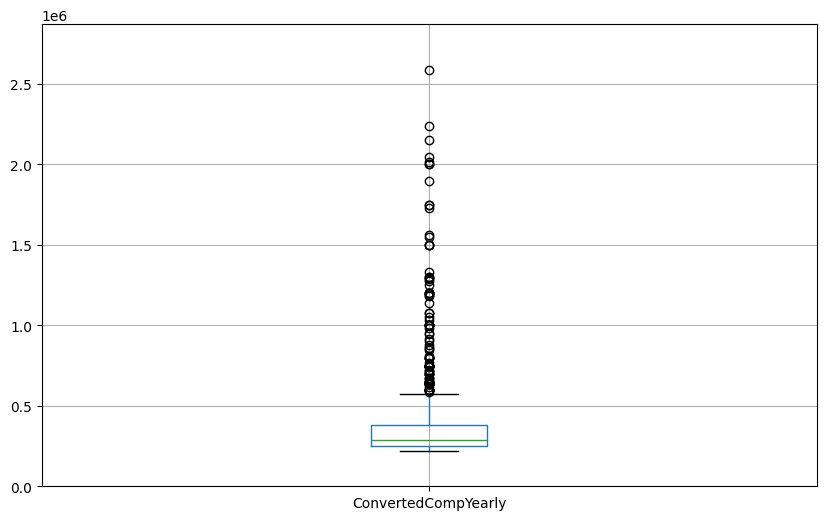

In [54]:
outliers.boxplot(column = 'ConvertedCompYearly', 
          figsize = (10,6))
plt.ylim(0, upper_bound * 13)

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [60]:
new_df = df.drop(axis = 0, index = outliers.index)
new_df #this new df has 64,459 rowa which is exactly 978 less than the original. 

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Outliers_ConvertedCompYearly
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,False
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN,False
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN,False
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65432,65433,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,Apples,Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","On the job training;School (i.e., University, ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
65433,65434,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
65434,65435,I am a developer by profession,25-34 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Social ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
65435,65436,I am a developer by profession,18-24 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects;Profe...,"Secondary school (e.g. American high school, G...",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,False


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [63]:
##Write your code here
print(df['Age'].value_counts(), df['Age'].isnull().sum())

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64 0


In [65]:
#mapping the binned age column with approximatted ages
age_midpoints = {
    'Under 18 years old': 16,    # approximate
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,     # approximate
    'Prefer not to say': None    # or np.nan
}

df['Age_numeric'] = df['Age'].map(age_midpoints)
print(df['Age_numeric'].value_counts(), df['Age_numeric'].isnull().sum())

Age_numeric
29.50    23911
39.50    14942
21.00    14098
49.50     6249
59.50     2575
16.00     2568
70.00      772
Name: count, dtype: int64 322


In [66]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat,Age_numeric
count,"65,437.00","33,740.00","29,658.00","29,324.00","29,393.00","29,411.00","29,450.00","29,448.00","29,456.00","29,456.00","29,450.00","29,445.00","23,435.00","29,126.00","65,115.00"
mean,"32,719.00","29,638,411,381,149,976,434,844,996,221,255,135,...",11.47,18.58,7.52,10.06,24.34,22.97,20.28,16.17,10.96,9.95,"86,155.29",6.94,33.01
std,"18,890.18","5,444,117,135,142,297,852,662,284,923,089,891,0...",9.17,25.97,18.42,21.83,27.09,27.02,26.11,24.85,22.91,21.78,"186,756.97",2.09,11.26
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,16.00
25%,"16,360.00","60,000.00",4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"32,712.00",6.00,21.00
50%,"32,719.00","110,000.00",9.00,10.00,0.00,0.00,20.00,15.00,10.00,5.00,0.00,0.00,"65,000.00",7.00,29.50
75%,"49,078.00","250,000.00",16.00,22.00,5.00,10.00,30.00,30.00,25.00,20.00,10.00,10.00,"107,971.50",8.00,39.50
max,"65,437.00","1,000,000,000,000,000,162,545,277,246,339,097,2...",50.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,"16,256,603.00",10.00,70.00


In [68]:
#finding the correlation between 'Age_numeric' & 'ConvertedCompYearly'
corr1 = df[['Age_numeric','ConvertedCompYearly']].corr()
corr1
#no correlation

,Age_numeric,ConvertedCompYearly
Age_numeric,1.00,0.12
ConvertedCompYearly,0.12,1.00


In [69]:
##finding the correlation between 'Age_numeric' & 'JobSat'
corr2 = df[['Age_numeric','JobSat']].corr()
corr2
#no correlation

,Age_numeric,JobSat
Age_numeric,1.00,0.07
JobSat,0.07,1.00


In [ ]:
#'WorkExp'
##finding the correlation between 'Age_numeric' & 'JobSat'
corr2 = df[['Age_numeric','JobSat']].corr()
corr2
#no correlation

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
